# Problem Statement

Predict the gender of the person based on the voice. Different statistical features have been given for the frequency of the voice based on which gender has to be predicted

In [1]:
 #importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC 
from sklearn.metrics import classification_report,plot_confusion_matrix
from sklearn.model_selection import GridSearchCV 

In [2]:
#loading our data
df = pd.read_csv('voice.csv')

In [3]:
df.head()

meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm  ...  centroid   meanfun    minfun  \
0   274.402906  0.893369  0.491918  ...  0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  ...  0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  ...  0.077316  0.098706  0.015656   
3     4.177296  0.963322  0.727232  ...  0.151228  0.088965  0.017798   
4     4.333713  0.971955  0.783568  ...  0.135120  0.106398  0.016931   

     maxfun   meandom    mindom    maxdom   dfrange   modindx  label  
0  0.275862  0.007812  0.007812  0.007812  0.000000  0.000000   male  
1  0.250000  0.009014  0.007812  0.054688  0.046875  0.052632   male  
2  0.271186  0.007990  0.007812  0.015625  0.007812  0.046512   male  
3  0.250000  0.201497  0.007812  0.562500  0.554688  0.247119   male  
4  0.266667  0.712812  0.007812  5.484375  5.476562  0.208274   male  

[5 rows x 21 columns]

In [4]:
df.tail()

meanfreq        sd    median       Q25       Q75       IQR      skew  \
3163  0.131884  0.084734  0.153707  0.049285  0.201144  0.151859  1.762129   
3164  0.116221  0.089221  0.076758  0.042718  0.204911  0.162193  0.693730   
3165  0.142056  0.095798  0.183731  0.033424  0.224360  0.190936  1.876502   
3166  0.143659  0.090628  0.184976  0.043508  0.219943  0.176435  1.591065   
3167  0.165509  0.092884  0.183044  0.070072  0.250827  0.180756  1.705029   

          kurt    sp.ent       sfm  ...  centroid   meanfun    minfun  \
3163  6.630383  0.962934  0.763182  ...  0.131884  0.182790  0.083770   
3164  2.503954  0.960716  0.709570  ...  0.116221  0.188980  0.034409   
3165  6.604509  0.946854  0.654196  ...  0.142056  0.209918  0.039506   
3166  5.388298  0.950436  0.675470  ...  0.143659  0.172375  0.034483   
3167  5.769115  0.938829  0.601529  ...  0.165509  0.185607  0.062257   

        maxfun   meandom    mindom    maxdom   dfrange   modindx   label  
3163  0.262295  0.832899  0.007812  4.210938  4.203125  0.161929  female  
3164  0.275862  0.909856  0.039062  3.679688  3.640625  0.277897  female  
3165  0.275862  0.494271  0.007812  2.937500  2.929688  0.194759  female  
3166  0.250000  0.791360  0.007812  3.593750  3.585938  0.311002  female  
3167  0.271186  0.227022  0.007812  0.554688  0.546875  0.350000  female  

[5 rows x 21 columns]

In [5]:
df.shape

(3168, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [7]:
df.describe().T

count       mean         std       min       25%       50%  \
meanfreq  3168.0   0.180907    0.029918  0.039363  0.163662  0.184838   
sd        3168.0   0.057126    0.016652  0.018363  0.041954  0.059155   
median    3168.0   0.185621    0.036360  0.010975  0.169593  0.190032   
Q25       3168.0   0.140456    0.048680  0.000229  0.111087  0.140286   
Q75       3168.0   0.224765    0.023639  0.042946  0.208747  0.225684   
IQR       3168.0   0.084309    0.042783  0.014558  0.042560  0.094280   
skew      3168.0   3.140168    4.240529  0.141735  1.649569  2.197101   
kurt      3168.0  36.568461  134.928661  2.068455  5.669547  8.318463   
sp.ent    3168.0   0.895127    0.044980  0.738651  0.861811  0.901767   
sfm       3168.0   0.408216    0.177521  0.036876  0.258041  0.396335   
mode      3168.0   0.165282    0.077203  0.000000  0.118016  0.186599   
centroid  3168.0   0.180907    0.029918  0.039363  0.163662  0.184838   
meanfun   3168.0   0.142807    0.032304  0.055565  0.116998  0.140519   
minfun    3168.0   0.036802    0.019220  0.009775  0.018223  0.046110   
maxfun    3168.0   0.258842    0.030077  0.103093  0.253968  0.271186   
meandom   3168.0   0.829211    0.525205  0.007812  0.419828  0.765795   
mindom    3168.0   0.052647    0.063299  0.004883  0.007812  0.023438   
maxdom    3168.0   5.047277    3.521157  0.007812  2.070312  4.992188   
dfrange   3168.0   4.994630    3.520039  0.000000  2.044922  4.945312   
modindx   3168.0   0.173752    0.119454  0.000000  0.099766  0.139357   

                75%          max  
meanfreq   0.199146     0.251124  
sd         0.067020     0.115273  
median     0.210618     0.261224  
Q25        0.175939     0.247347  
Q75        0.243660     0.273469  
IQR        0.114175     0.252225  
skew       2.931694    34.725453  
kurt      13.648905  1309.612887  
sp.ent     0.928713     0.981997  
sfm        0.533676     0.842936  
mode       0.221104     0.280000  
centroid   0.199146     0.251124  
meanfun    0.169581     0.237636  
minfun     0.047904     0.204082  
maxfun     0.277457     0.279114  
meandom    1.177166     2.957682  
mindom     0.070312     0.458984  
maxdom     7.007812    21.867188  
dfrange    6.992188    21.843750  
modindx    0.209183     0.932374

In [8]:
df.duplicated().sum()

2

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.reset_index(drop=True, inplace=True)

In [11]:
df.shape

(3166, 21)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3166 entries, 0 to 3165
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3166 non-null   float64
 1   sd        3166 non-null   float64
 2   median    3166 non-null   float64
 3   Q25       3166 non-null   float64
 4   Q75       3166 non-null   float64
 5   IQR       3166 non-null   float64
 6   skew      3166 non-null   float64
 7   kurt      3166 non-null   float64
 8   sp.ent    3166 non-null   float64
 9   sfm       3166 non-null   float64
 10  mode      3166 non-null   float64
 11  centroid  3166 non-null   float64
 12  meanfun   3166 non-null   float64
 13  minfun    3166 non-null   float64
 14  maxfun    3166 non-null   float64
 15  meandom   3166 non-null   float64
 16  mindom    3166 non-null   float64
 17  maxdom    3166 non-null   float64
 18  dfrange   3166 non-null   float64
 19  modindx   3166 non-null   float64
 20  label     3166 non-null   obje

### EDA

<AxesSubplot:xlabel='modindx'>

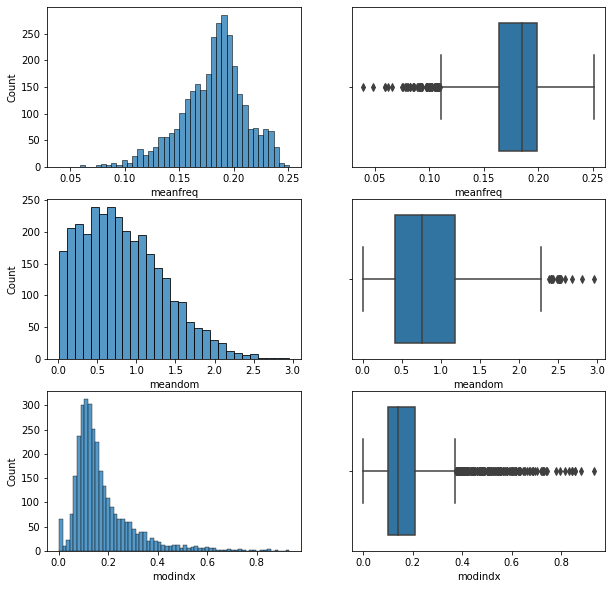

In [13]:
fig, axes = plt.subplots(nrows=3,ncols=2, figsize=(10,10))
sns.histplot(x='meanfreq', data=df, ax=axes[0][0])
sns.boxplot(x='meanfreq', data=df, ax=axes[0][1])

sns.histplot(x='meandom', data=df, ax=axes[1][0])
sns.boxplot(x='meandom', data=df, ax=axes[1][1])

sns.histplot(x='modindx', data=df, ax=axes[2][0])
sns.boxplot(x='modindx', data=df, ax=axes[2][1])

<AxesSubplot:xlabel='label', ylabel='count'>

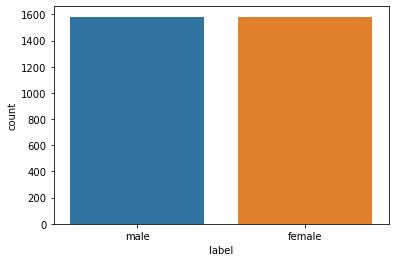

In [14]:
sns.countplot(x='label', data=df)

In [15]:
df.label.value_counts(normalize=1)

female    0.5
male      0.5
Name: label, dtype: float64

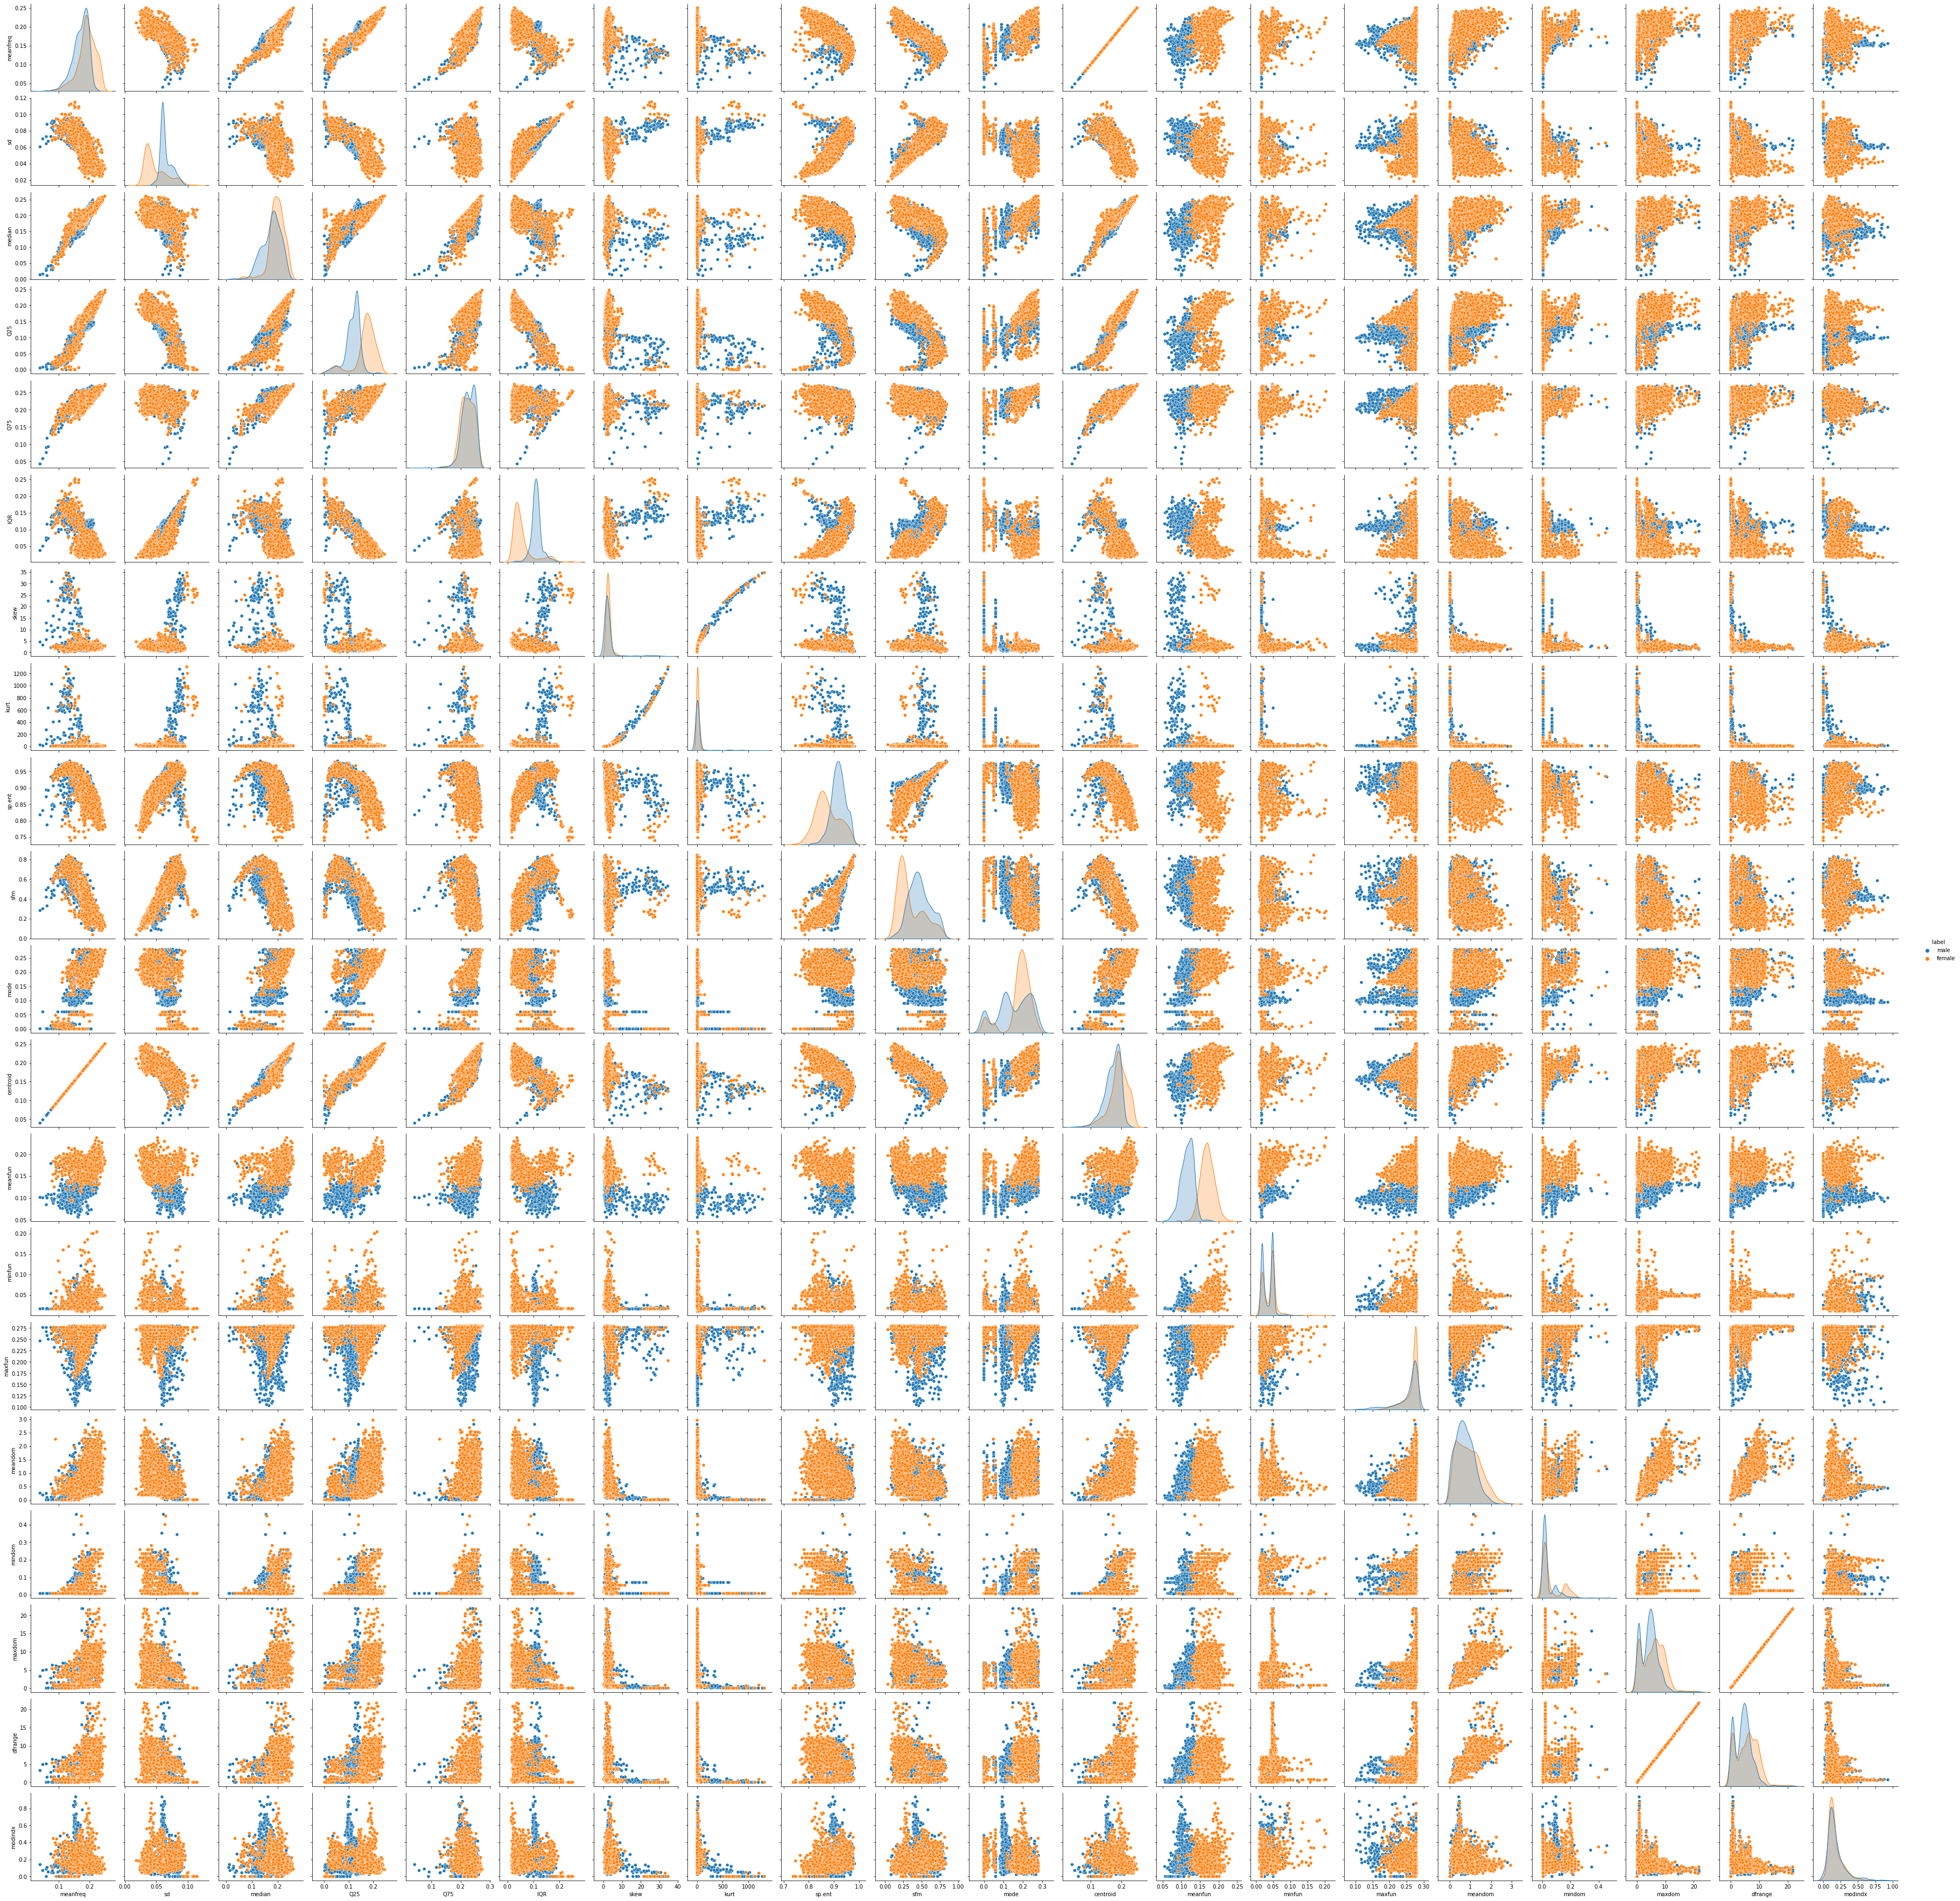

In [16]:
sns.pairplot(data=df, hue='label')

### Outlier Treatment

In [19]:
num_list = ['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx']

<AxesSubplot:>

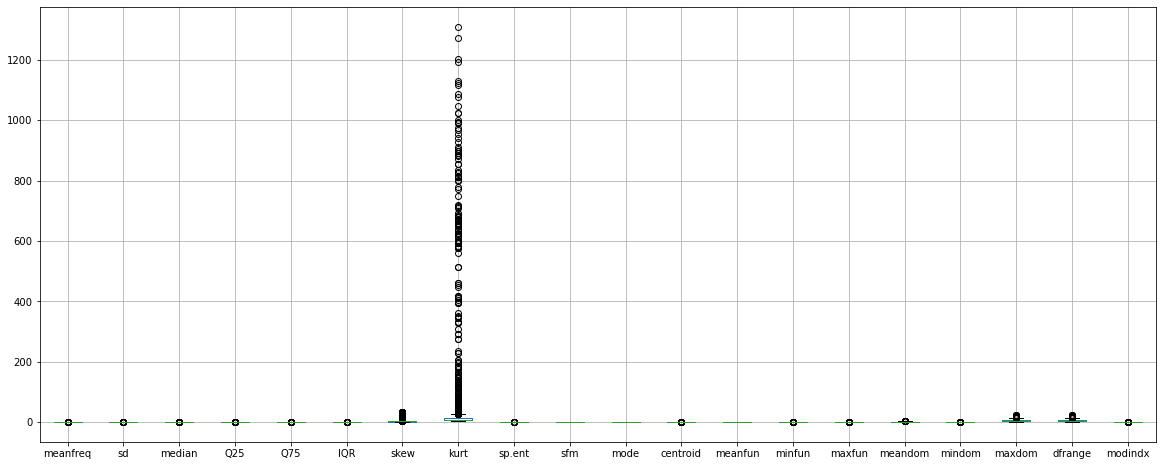

In [20]:
plt.subplots(figsize=(20,8))
df[num_list].boxplot()

In [21]:
def treatoutlier(col):
    q1 = np.quantile(df[col],0.25)
    q2 = np.quantile(df[col],0.5)
    q3 = np.quantile(df[col],0.75)
    lowT = np.quantile(df[col],0.05)
    highT = np.quantile(df[col],0.95)
    iqr = q3-q1
    utv = q3 + (1.5*iqr)
    ltv = q1 - (1.5*iqr)
    return ltv, utv, lowT, highT

In [22]:
df_num = df.select_dtypes(exclude='object')
num_list = list(df_num.columns)

In [23]:
range(0,len(num_list))

range(0, 20)

In [24]:
for i in range(0,len(num_list)-1):
    lwv, uwv, lcv, hcv = treatoutlier(num_list[i])
    df[num_list[i]] = np.where(df[num_list[i]] > uwv, hcv, df[num_list[i]])
    df[num_list[i]] = np.where(df[num_list[i]] < lwv, lcv, df[num_list[i]])

<AxesSubplot:>

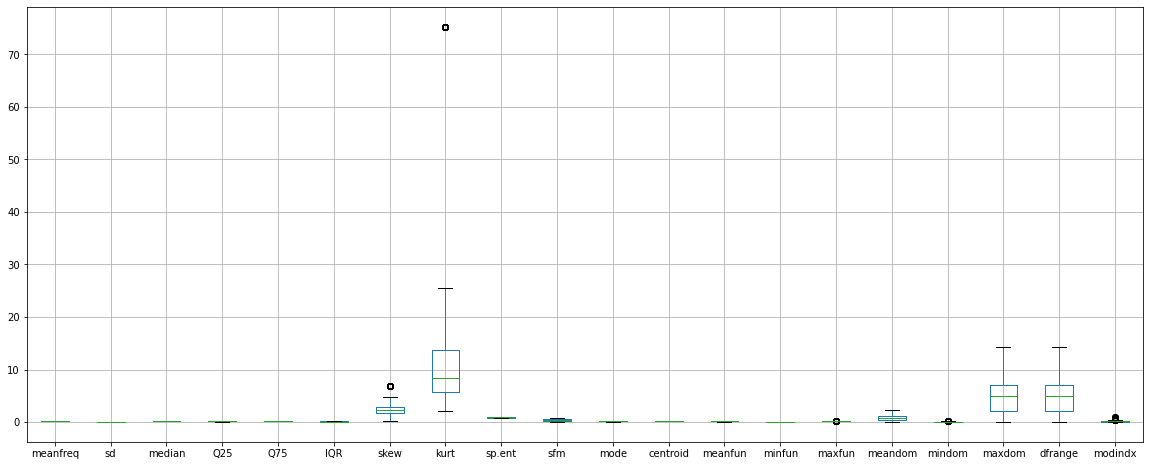

In [25]:
plt.subplots(figsize=(20,8))
df[num_list].boxplot()

In [26]:
# split our data into training and testing set

In [27]:
x = df.drop('label', axis=1)
y = df['label']

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 10) #splitting our data

In [29]:
# Scaling
sclr = StandardScaler()

In [30]:
x_train = sclr.fit_transform(x_train)

In [31]:
x_test = sclr.transform(x_test)

### KNN Model

In [32]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(3,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    # evaluate test accuracy
    scores = knn.score(x_test, y_test)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

[0.020000000000000018,
 0.02631578947368418,
 0.028421052631578902,
 0.03368421052631576,
 0.032631578947368456,
 0.037894736842105314,
 0.04105263157894734,
 0.040000000000000036,
 0.040000000000000036]

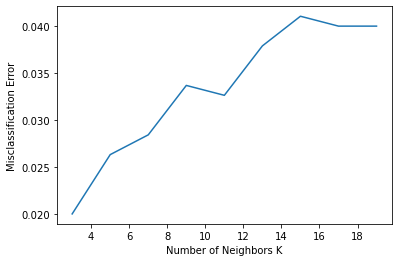

In [34]:
# plot misclassification error vs k
plt.plot(range(3,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [35]:
KNN_model1 = KNeighborsClassifier(n_neighbors=3)
KNN_model1.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

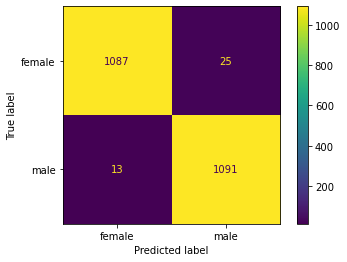

In [36]:
y_train_pred1 = KNN_model1.predict(x_train)
plot_confusion_matrix(KNN_model1,x_train,y_train)

In [37]:
print(classification_report(y_train, y_train_pred1))

              precision    recall  f1-score   support

      female       0.99      0.98      0.98      1112
        male       0.98      0.99      0.98      1104

    accuracy                           0.98      2216
   macro avg       0.98      0.98      0.98      2216
weighted avg       0.98      0.98      0.98      2216



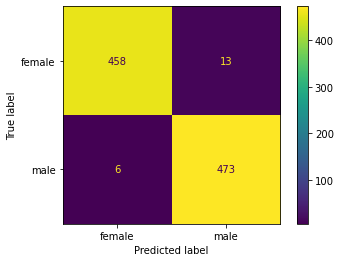

In [38]:
y_test_pred1 = KNN_model1.predict(x_test)
plot_confusion_matrix(KNN_model1,x_test,y_test)

In [39]:
print(classification_report(y_test, y_test_pred1))

              precision    recall  f1-score   support

      female       0.99      0.97      0.98       471
        male       0.97      0.99      0.98       479

    accuracy                           0.98       950
   macro avg       0.98      0.98      0.98       950
weighted avg       0.98      0.98      0.98       950



### SVM Model 

In [40]:
svc = SVC()

In [41]:
svc.fit(x_train,y_train) #fitting the data to our model

SVC()

In [42]:
y_pred_train = svc.predict(x_train)
y_pred_test = svc.predict(x_test) #predicting the result

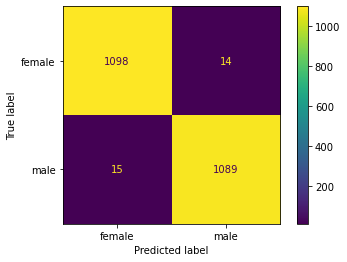

In [43]:
plot_confusion_matrix(svc, x_train,y_train)

In [44]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

      female       0.99      0.99      0.99      1112
        male       0.99      0.99      0.99      1104

    accuracy                           0.99      2216
   macro avg       0.99      0.99      0.99      2216
weighted avg       0.99      0.99      0.99      2216



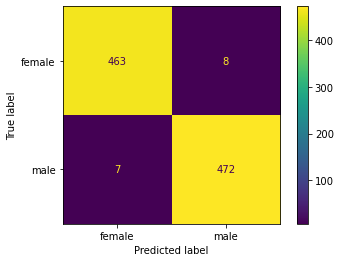

In [45]:
plot_confusion_matrix(svc, x_test,y_test)

In [46]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

      female       0.99      0.98      0.98       471
        male       0.98      0.99      0.98       479

    accuracy                           0.98       950
   macro avg       0.98      0.98      0.98       950
weighted avg       0.98      0.98      0.98       950



### Parameter Tuning

The gamma parameter defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’. The gamma parameters can be seen as the inverse of the radius of influence of samples selected by the model as support vectors.

The C parameter trades off correct classification of training examples against maximization of the decision function’s margin. For larger values of C, a smaller margin will be accepted if the decision function is better at classifying all training points correctly. A lower C will encourage a larger margin, therefore a simpler decision function, at the cost of training accuracy. In other words``C`` behaves as a regularization parameter in the SVM.

For a linear kernel, we just need to optimize the C parameter. However, if we want to use an RBF kernel, both C and gamma parameter need to optimized simultaneously. If gamma is large, the effect of C becomes negligible. If gamma is small, C affects the model just like how it affects a linear model. Typical values for c and gamma are as follows. However, specific optimal values may exist depending on the application

0.0001 < gamma < 10

0.1 < c < 100

In [47]:
param_grid = {
    #'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10, 100],
    'gamma': [0.0001, 0.01, 0.1, 1, 10]
}

svc1 = SVC(random_state=10)

grid_search = GridSearchCV(estimator = svc1, param_grid = param_grid, cv = 5)

In [48]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=10),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [0.0001, 0.01, 0.1, 1, 10]})

In [49]:
grid_search.best_params_

{'C': 100, 'gamma': 0.1}

In [50]:
svc1 = grid_search.best_estimator_

In [51]:
y_pred_train = svc1.predict(x_train)
y_pred_test = svc1.predict(x_test) #predicting the result

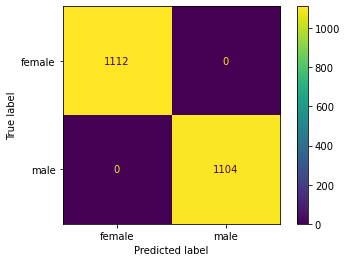

In [52]:
plot_confusion_matrix(svc1, x_train,y_train)

In [53]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

      female       1.00      1.00      1.00      1112
        male       1.00      1.00      1.00      1104

    accuracy                           1.00      2216
   macro avg       1.00      1.00      1.00      2216
weighted avg       1.00      1.00      1.00      2216



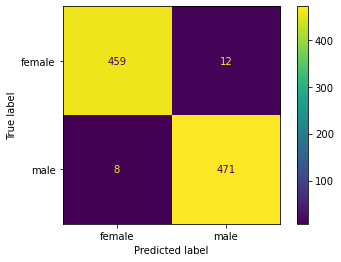

In [54]:
plot_confusion_matrix(svc1, x_test,y_test)

In [55]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

      female       0.98      0.97      0.98       471
        male       0.98      0.98      0.98       479

    accuracy                           0.98       950
   macro avg       0.98      0.98      0.98       950
weighted avg       0.98      0.98      0.98       950



### Happy Learning